<a href="https://colab.research.google.com/github/clint-bg/publicationdata/blob/main/safeSeparation/Heat_Injury.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heat Injury

Injury from exposure to radiative heat flux depends on the heat flux and the duration. Often the heat flux given off by the source is not a constant value, like from a burning collection of propellant. The heat flux is low than rises as more and more material is burning and then decreases. 

Below is a comparison of the heat injury (integral of the heat flux over time) for two differenct scenarios:
- a normal or gaussian like profile of heat flux versus time
- a non-normal profile

In [1]:
# import needed packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.integrate as integrate

## Normal profile of heat flux

Below is the normal estimate of a heat flux event as a function of time with the total thermal damage estimated

In [2]:
t = np.linspace(0,1.96*2,100)

In [3]:
n = norm.pdf(t,1.96)*20 #a ficticious but plausible heat flux curve

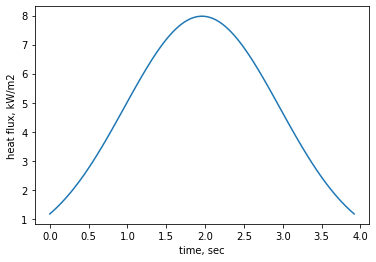

In [4]:
plt.plot(t,n)
plt.xlabel("time, sec"); plt.ylabel("heat flux, kW/m2")
plt.show()

If the entire curve is integrated, that is a measure of the thermal damage. Such an approximation of the damage assumes that the damage scales linearly with heat flux. For example, if a person is exposed to 4 kW/m2 for 20 seconds, that damage is 80 kJ/m2, while a thermal heat flux 2 times that 4 kW/m2 value for the same 20 seconds yields a damage of 160 kJ/m2, a correspondingly linear outcome (double the heat flux and double the damage). However, it has been published that the thermal damage does not scale linearly with the heat flux. If the relationship to damage is thus non-linear, with, for example, a factor of an exponential of 1.2 then for a heat flux of 4 kW/m2 for 20 second the damage would be (20\*4^1.2) 105 kJ/m2 and if the heat flux is double to 8 the damage would be (20\*8^1.2) 242 kJ/mol. This is a non-linear relationship as when the heat flux is doubled, the damage increases by a factor greater than 2 (2.3 in this case). It is not known what that exponential multiplier would be for thermal damage but a value of 1.2 is considered conservative.

In [5]:
factor = 1.2

In [6]:
#estimate of the total damage from the curve
integrate.simpson(n**factor,t)

26.779256051514018

The above value is the damage measure given we know heat flux as a function of time. If we only know the average and the maximum heat fluxes one way is to use the average value and correspondingly estimate the damage:

In [7]:
#using the average value of the heat flux burn to estimate the damage with the entire duration
max(t)*n.mean()**factor

25.81446659226213

That 25.8 value is close to the 26.8 damage "true" value

If on the other hand, the peak value is used with half the duration of the burn, the damage estimate is

In [8]:
max(t)/2*n.max()**factor #max and half the time

23.68547013494428

That 23.7 value is significantly less than the 26.8 "true" value

Conclusion: the average value and full duration is a more accurate (and conservative) estimate than the peak value and half duration.

In [9]:
dT = n.mean()*max(t)/n.max()

In [10]:
dT/max(t)

0.6029657243937556

## Non-normal profile of heat flux: Example 1

A non-normal profile of the heat flux during a burn from an energetic material is a more likely scenario. In such a non-normal profile, the burn may be proceeding in an average way and then ocasionally gives spurts or high heat fluxes. The below profile is fictional but also plausible.

In [11]:
nn = np.concatenate((n[0:int(len(n)/2)],np.ones(500)*n.max(),n[int(len(n)/2):]))
#add a spurt
nn = nn + np.concatenate((n*0.5,np.zeros(500)))

In [12]:
tt = np.linspace(0,1.96*20,len(nn))

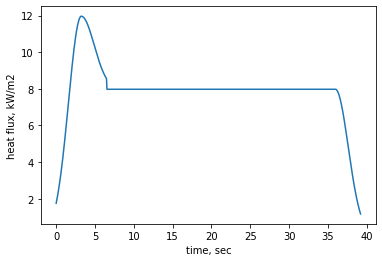

In [13]:
plt.plot(tt,nn)
plt.xlabel("time, sec"); plt.ylabel("heat flux, kW/m2")
plt.show()

Completing the same steps as above for the normal curve, we get the following results:

In [14]:
#actual thermal damage using the heat flux
integrate.simpson(nn**factor,tt)

468.3304325267019

In [15]:
#using the average value of the heat flux burn to estimate the damage with the entire duration
max(tt)*nn.mean()**factor

464.6711604414533

In [16]:
max(tt)/2*nn.max()**factor #max and half the time

385.29335623339824

Consistent with the previous result with a normal curve, this instance of a non-normal curve also yields that the average value for the total duration is more accurate (and conservative) than is the max for half the time.

Conclusion: again, the average value and full duration is a more conservative estimate than the peak value and half duration.

In [17]:
dTnn = nn.mean()*max(tt)/nn.max()

In [18]:
dTnn/max(tt)

0.6560498429545147

## Non-normal profile of heat flux: Example 2

A second non-normal profile of the heat flux during a burn from an energetic material is also presented. In this case the max heat flux is significantly higher than a baseline heat flux. The below profile is fictional but also plausible.

In [19]:
nn2 = np.concatenate((n[0:int(len(n)/2)],np.ones(500)*n.max(),n[int(len(n)/2):]))
#add a spurt
nn2 = nn2 + np.concatenate((n*0.5*3,np.zeros(500)))

In [20]:
tt2 = np.linspace(0,1.96*20,len(nn2))

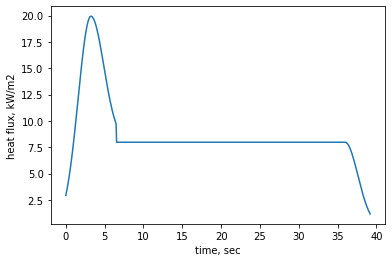

In [21]:
plt.plot(tt2,nn2)
plt.xlabel("time, sec"); plt.ylabel("heat flux, kW/m2")
plt.show()

Completing the same steps as above for the normal curve, we get the following results:

In [22]:
#actual thermal damage using the heat flux
integrate.simpson(nn2**factor,tt2)

530.647112329645

In [23]:
#using the average value of the heat flux burn to estimate the damage with the entire duration
max(tt2)*nn2.mean()**factor

522.1805055705045

In [24]:
max(tt2)/2*nn2.max()**factor #max and half the time

711.2299227354761

Note that in this case, using the max value of the curve and half the burn time to estimate the thermal damage results in a more conservative value but it is significantly over estimates teh actual thermal damage.

In [25]:
dT2 = nn2.mean()*max(tt2)/nn2.max()

In [26]:
dT2/max(tt2)

0.43382762073229264

## Hundreds of Thousands of Plots 

If there are 8 different bins or histograms of random height and random duration

In [42]:
#Each bin has a height and a width and there are 8 bins. Each row represents a burn event. 
#The distribution of heights and widths is uniform between: 0 and 4 minutes for width and 0 and 100 for kW/m2 for heat flux.
durations = []; heights = []
notests = 200000; factor = 1.2
for each in range(notests):
    durations.append(np.random.beta(0.5,0.5,8)*4) #4 minute max duration per subevent
    heights.append(np.random.beta(0.5,0.5,8)*80) # 0-200 kW/m2

In [43]:
#heights = np.insert(heights,0,0,axis=1);
#heights = np.insert(heights,9,0,axis=1)#heights = np.append(heights,0,1)

In [44]:
indexh = np.random.randint(0,notests,6)
def durs(j):
    out = [(durations[indexh[j]][0:i+1]).sum() for i,each in enumerate(durations[indexh[j]])]-durations[indexh[j]]
    return out #np.append(out,out[-1]+durations[indexh[j]][-1])

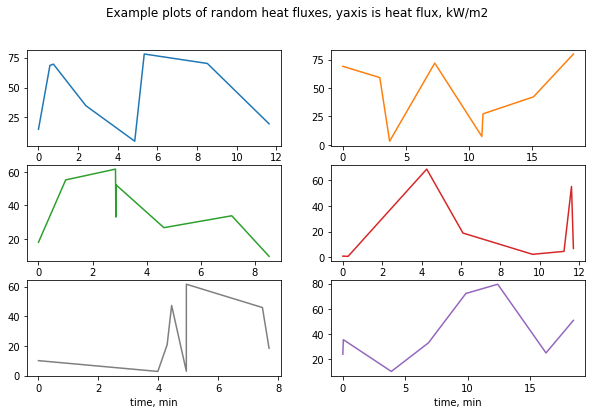

In [45]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(3, 2,figsize=[10,6])
fig.suptitle('Example plots of random heat fluxes, yaxis is heat flux, kW/m2')
ax1.plot(durs(0),heights[indexh[0]])
ax2.plot(durs(1),heights[indexh[1]], 'tab:orange')
ax3.plot(durs(2),heights[indexh[2]], 'tab:green')
ax4.plot(durs(3),heights[indexh[3]], 'tab:red')
ax5.plot(durs(4),heights[indexh[4]], 'tab:gray')
ax5.set_xlabel("time, min")
ax6.plot(durs(5),heights[indexh[5]], 'tab:purple')
ax6.set_xlabel("time, min")
plt.show()

Although shown as lines, they're really bars with the above given durations and heights

In [46]:
averages = np.array([each.mean() for each in heights])
tdur = np.array([each.sum() for each in durations])
peaks = np.array([each.max() for each in heights])

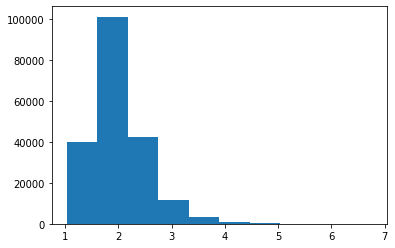

In [47]:
#plot of the ratio of the peak to the average for the example events
ratio = peaks/averages
plt.hist(ratio);plt.show()

In [48]:
ratio.max()

6.749839507442271

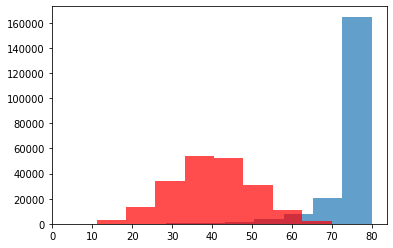

In [49]:
plt.hist(peaks,alpha=0.7)
plt.hist(averages,alpha=0.7,color='r')
plt.show()

In [50]:
#convert to numpy arrays
durations = np.array(durations); heights = np.array(heights)

In [51]:
integ = durations*heights**factor
integl = [each.sum() for each in integ]

In [52]:
meth1 = tdur*averages**factor; meth2 = tdur/2*peaks**factor; meth3 = tdur*averages/peaks*peaks**factor

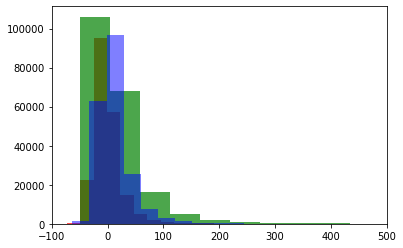

In [53]:
plt.hist((meth1-integl)/integl*100,bins=50,alpha=0.7,color='r')
plt.hist((meth2-integl)/integl*100,bins=50,alpha=0.7,color='g')
plt.hist((meth3-integl)/integl*100,bins=50,alpha=0.5,color='b')
plt.xlim(-100,500)
plt.show()

In [54]:
((meth1-integl)/integl*100).mean(),((meth1-integl)/integl*100).std()

(-0.7946549327551506, 29.216520698921105)

In [55]:
((meth2-integl)/integl*100).mean(),((meth2-integl)/integl*100).std()

(16.05975001546028, 59.76305350182554)

In [56]:
((meth3-integl)/integl*100).mean(),((meth3-integl)/integl*100).std()

(13.636753526230487, 35.348443987262854)